In [1]:
import sys
import torch
sys.path.append('..')

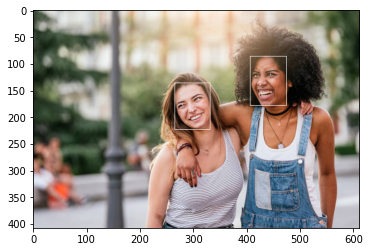

In [2]:
import facer

image = facer.hwc2bchw(facer.read_hwc('data/twogirls.jpg')) # image: 1 x 3 x h x w
face_detector = facer.face_detector('retinaface/mobilenet', device='cpu')
faces = face_detector(image)

facer.show_bchw(facer.draw_bchw(image, faces))

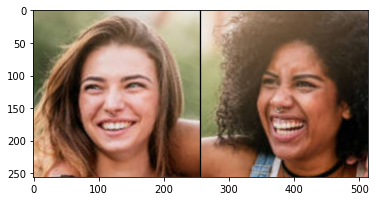

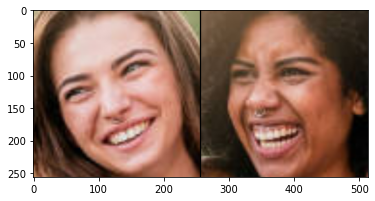

In [3]:
import torch.nn.functional as F
import facer.transform

matrix_align = facer.transform.get_face_align_matrix(faces['points'], (256, 256), 1.0)
matrix_crop = facer.transform.get_crop_and_resize_matrix(faces['rects'], (256, 256), 1.0)

grid = facer.transform.make_tanh_warp_grid(matrix_align, 0.0, (256, 256), image.shape[2:])
w_image = F.grid_sample(image.float()[faces['image_ids']], grid, 'bilinear', align_corners=False)
facer.show_bchw(w_image)

grid = facer.transform.make_tanh_warp_grid(matrix_crop, 0.0, (256, 256), image.shape[2:])
w_image = F.grid_sample(image.float()[faces['image_ids']], grid, 'bilinear', align_corners=False)
facer.show_bchw(w_image)